##### Это финальное задание по курсу «Поиск структуры в данных».

В нем вы попробуете визуализировать данные при помощи PCA и t-SNE и сравните визуально качество этих методов. Также вы попробуете использовать новые признаковые описания для повышения качества классификации объектов.

В качестве данных для этого задания будем использовать данные соревнования Otto Group Product Classification Challenge: https://www.kaggle.com/c/otto-group-product-classification-challenge

Так как данных там может быть слишком много для обработки на домашнем компьютере с помощью t-SNE, то мы сделали их случайную подвыборку и приложили к заданию (файл data.csv).

In [2]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import sklearn.ensemble
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics
import numpy as np
import pandas as pd

In [3]:
%matplotlib inline

### Загрузка данных

Загрузите данные из __data.csv__. Положите первые 70% объектов для обучения моделей, а оставшиеся 30% для контроля. Учтите, что первый столбец — это __id__ объекта и его нужно убрать из признаков (потому что сейчас классы объектов отсортированы по __id__). Так как некоторые алгоритмы и метрики считают, что метки классов — это последовательные числа с нуля, то сразу приведите целевую переменную к такому виду. Отрисовку и понижение размерности данных делайте сразу и для обучающей, и для тестовой выборки.

In [4]:
df = pd.read_csv('data.csv')
y = df['target']
X = df.drop(columns=['id', 'target'])
# X_train, X_val, y_train, y_val = sklearn.model_selection.train_test_split(X, y, test_size=0.3, shuffle=False)
X.head()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
0,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
3,0,0,1,0,1,0,0,0,0,2,...,0,2,9,0,8,3,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


### Визуализация с помощью PCA

Понизьте размерность данных до 2-ух с помощью метода главных компонент. Нарисуйте полученную выборку, при этом цветом выделите объекты разных классов.

In [5]:
def visualize_data(x, labels):
    colors = cm.rainbow(np.linspace(0, 1, len(set(labels))))
    for y, c in zip(set(labels), colors):
        plt.scatter(x[labels==y, 0], x[labels==y, 1], c=c[np.newaxis, :], label=str(y))
    plt.legend()

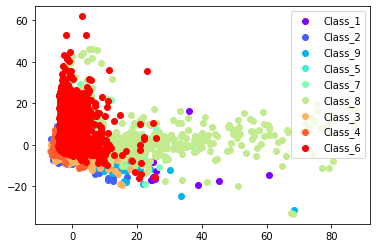

In [6]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
visualize_data(X_pca, y)

In [7]:
X.head()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
0,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
3,0,0,1,0,1,0,0,0,0,2,...,0,2,9,0,8,3,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


### Визуализация с помощью t-SNE

Теперь понизьте размерность данных до 2-ух с помощью метода t-SNE. В качестве параметров возьмите learning_rate=1000, init="random" и random_state=1234 (последнее — для воспроизводимости результата). Нарисуйте полученную выборку, при этом цветом выделите объекты разных классов. Сравните качественно разделимость классов при понижении размерности с помощью PCA и t-SNE.

In [8]:
tsne = TSNE(n_components=2, learning_rate=1000, init='random', random_state=1234)
X_tsne = tsne.fit_transform(X)

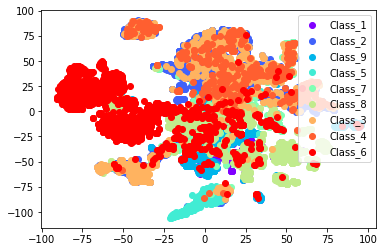

In [9]:
visualize_data(X_tsne, y)

#### Сравнение качества разделения классов методами PCA и TNSE

Модель, построенная алгоритмом PCA, разделяет плохо. Большинство точек накладываются друг на друга. Например, class_9 практически не видно на изображении. Возможно применение алгоритмов на поиск линейных зависимостей для данных не подходит. Метод TNSE разделяет данные лучше, все классы видны. Несмотря на это, они так же накладываются друг на друга.

### Обучение моделей

Обучите логистическую регрессию (linear_model.LogisticRegression) и случайный лес (ensemble.RandomForestClassifier) из sklearn. В первом случае подберите оптимальный параметр $C$ на отрезке $[10^{-4}, 10^{4}]$ (по степеням $10$ с шагом $1$, начиная с $-4$), а во втором при фиксированном числе деревьев в 50 подберите $max\_depth$ из отрезка $[2, 48]$ с шагом в 2. За целевую метрику качества возьмите мультиклассовый log-loss. В качестве схемы валидации используйте стратифицированную кросс-валидацию по 5-ти фолдам. Какие параметры оказались оптимальными? 

In [10]:
X_train_pca, X_test_pca, y_train, y_test = sklearn.model_selection.train_test_split(X_pca, y, test_size=0.3, shuffle=False)
X_train_tsne, X_test_tsne, _, _ = sklearn.model_selection.train_test_split(X_tsne, y, test_size=0.3, shuffle=False)

In [16]:
# Тренировка LogisticRegression + original data
clf = LogisticRegression(max_iter=10000)
grid = {'C': np.logspace(-4, 4, 9)}
clf_cv = GridSearchCV(clf, grid, cv=5)
clf_cv.fit(X[:7000], y[:7000])
print("tuned hpyerparameters :(best parameters) ",clf_cv.best_params_)
print("accuracy :",clf_cv.best_score_)

# log loss score
log_loss = sklearn.metrics.log_loss(list(y[7000:]), clf_cv.best_estimator_.predict_proba(X[7000:]))
accuracy = sklearn.metrics.accuracy_score(list(y[7000:]), clf_cv.best_estimator_.predict(X[7000:]))
print('log loss: ' + str(log_loss))
print('accuracy test: ' + str(accuracy))

/usr/local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

tuned hpyerparameters :(best parameters)  {'C': 0.1}
accuracy : 0.7499999999999999
log loss: 0.7147132338392032
accuracy test: 0.7456666666666667


In [19]:
# Тренировка RandomForestClassifier + original data
clf_rfc = RandomForestClassifier(n_estimators=50)
grid = {'max_depth': np.arange(2, 49, 2)}
clf_cv_rfc = GridSearchCV(clf_rfc, grid, cv=5)
clf_cv_rfc.fit(X[:7000], y[:7000])
print("tuned hpyerparameters :(best parameters) ",clf_cv_rfc.best_params_)
print("accuracy :",clf_cv_rfc.best_score_)

# log loss score
# best_rfc_pca = RandomForestClassifier(n_estimators=50, max_depth=8)
# best_rfc_pca.fit(X_train_pca, y_train)
log_loss = sklearn.metrics.log_loss(list(y[7000:]), clf_cv_rfc.best_estimator_.predict_proba(X[7000:]))
accuracy = sklearn.metrics.accuracy_score(list(y[7000:]), clf_cv_rfc.best_estimator_.predict(X[7000:]))
print('log loss: ' + str(log_loss))
print('accuracy test: ' + str(accuracy))

tuned hpyerparameters :(best parameters)  {'max_depth': 30}
accuracy : 0.7537142857142858
log loss: 0.7922563872371007
accuracy test: 0.7556666666666667


Посчитайте accuracy и log-loss на отложенной выборке для логистической регрессии и случайного леса. Какие они получились? Какой алгоритм лучше?

Лучший accuracy у RandomForestClassifier (0.7556). Лучший log loss у LogisticRegression, он равен 0.7147.

### Использование PCA для улучшения классификации

Теперь попробуйте использовать PCA для улучшения качества классификации. Добавьте признаки из маломерного пространства (по 2 числа на каждый объект) в обучающую и тестовую выборку. Заново переподберите параметры к логистической регрессии и случайному лесу. Удалось ли таким образом улучшить качество моделей? Почему с теоретической точки зрения добавление признаков из PCA не должно улучшить качество логистической регрессии?

In [11]:
X_train_pca_conc = X[:7000].assign(pca_1 = X_train_pca[:, 0])
X_train_pca_conc = X_train_pca_conc.assign(pca_2 = X_train_pca[:, 1])
X_train_tsne_conc = X[:7000].assign(tsne_1 = X_train_tsne[:, 0])
X_train_tsne_conc = X_train_tsne_conc.assign(pca_2 = X_train_tsne[:, 1])
X_test_pca_conc = X[7000:].assign(pca_1 = X_test_pca[:, 0])
X_test_pca_conc = X_test_pca_conc.assign(pca_2 = X_test_pca[:, 1])
X_test_tsne_conc = X[7000:].assign(tsne_1 = X_test_tsne[:, 0])
X_test_tsne_conc = X_test_tsne_conc.assign(pca_2 = X_test_tsne[:, 1])
X_test_pca_conc

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,pca_1,pca_2
7000,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,-4.322482,0.338497
7001,1,0,0,0,0,0,1,0,0,1,...,1,1,0,0,0,0,0,0,3.249619,-4.710174
7002,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,-3.836205,-2.350174
7003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.572264,-3.460876
7004,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,-3.861774,-3.572917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,-0.017330,-2.254649
9996,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,3.525769,4.586862
9997,0,0,3,1,0,0,0,13,1,0,...,0,0,1,3,0,0,0,0,0.880791,-0.553258
9998,0,1,2,2,0,0,0,0,0,0,...,0,1,0,1,0,1,0,0,-3.001986,10.533527


In [26]:
# Тренировка LogisticRegression + PCA
clf = LogisticRegression(max_iter=10000)
grid = {'C': np.logspace(-4, 4, 9)}
clf_cv = GridSearchCV(clf, grid, cv=5)
clf_cv.fit(X_train_pca_conc, y[:7000])
print("tuned hpyerparameters :(best parameters) ",clf_cv.best_params_)
print("accuracy :",clf_cv.best_score_)

# log loss score
# best_clf_pca = clf_cv.best_estimator_
# best_clf_pca.fit(X[:7000], y[:7000])
log_loss = sklearn.metrics.log_loss(list(y[7000:]), clf_cv.best_estimator_.predict_proba(X_test_pca_conc))
accuracy = sklearn.metrics.accuracy_score(list(y[7000:]), clf_cv.best_estimator_.predict(X_test_pca_conc))
print('log loss: ' + str(log_loss))
print('accuracy test: ' + str(accuracy))

tuned hpyerparameters :(best parameters)  {'C': 0.1}
accuracy : 0.7495714285714286
log loss: 0.7153187616357266
accuracy test: 0.7446666666666667


In [27]:
# Тренировка RandomForestClassifier + original data
clf_rfc = RandomForestClassifier(n_estimators=50)
grid = {'max_depth': np.arange(2, 49, 2)}
clf_cv_rfc = GridSearchCV(clf_rfc, grid, cv=5)
clf_cv_rfc.fit(X_train_pca_conc, y[:7000])
print("tuned hpyerparameters :(best parameters) ",clf_cv_rfc.best_params_)
print("accuracy :",clf_cv_rfc.best_score_)

# log loss score
# best_rfc_pca = RandomForestClassifier(n_estimators=50, max_depth=8)
# best_rfc_pca.fit(X_train_pca, y_train)
log_loss = sklearn.metrics.log_loss(list(y[7000:]), clf_cv_rfc.best_estimator_.predict_proba(X_test_pca_conc))
accuracy = sklearn.metrics.accuracy_score(list(y[7000:]), clf_cv_rfc.best_estimator_.predict(X_test_pca_conc))
print('log loss: ' + str(log_loss))
print('accuracy test: ' + str(accuracy))

tuned hpyerparameters :(best parameters)  {'max_depth': 30}
accuracy : 0.7547142857142857
log loss: 0.851806748172509
accuracy test: 0.7526666666666667


### Использование t-SNE для улучшения классификации

Теперь проделайте тоже самое с признаками из t-SNE. Стало ли лучше (относительно оригинальных признаков)?

In [13]:
# Тренировка LogisticRegression + TSNE
clf = LogisticRegression(max_iter=5000)
grid = {'C': np.logspace(-4, 4, 9)}
clf_cv = GridSearchCV(clf, grid, cv=5)
clf_cv.fit(X_train_tsne_conc, y[:7000])
print("tuned hpyerparameters :(best parameters) ",clf_cv.best_params_)
print("accuracy :",clf_cv.best_score_)

# log loss score
# best_clf_pca = clf_cv.best_estimator_
# best_clf_pca.fit(X[:7000], y[:7000])
log_loss = sklearn.metrics.log_loss(list(y[7000:]), clf_cv.best_estimator_.predict_proba(X_test_tsne_conc))
accuracy = sklearn.metrics.accuracy_score(list(y[7000:]), clf_cv.best_estimator_.predict(X_test_tsne_conc))
print('log loss: ' + str(log_loss))
print('accuracy test: ' + str(accuracy))

/usr/local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

tuned hpyerparameters :(best parameters)  {'C': 0.1}
accuracy : 0.7488571428571429
log loss: 0.707771978384066
accuracy test: 0.748


In [14]:
# Тренировка RandomForestClassifier + TSNE
clf_rfc = RandomForestClassifier(n_estimators=50)
grid = {'max_depth': np.arange(2, 49, 2)}
clf_cv_rfc = GridSearchCV(clf_rfc, grid, cv=5)
clf_cv_rfc.fit(X_train_tsne_conc, y[:7000])
print("tuned hpyerparameters :(best parameters) ",clf_cv_rfc.best_params_)
print("accuracy :",clf_cv_rfc.best_score_)

# log loss score
# best_rfc_pca = RandomForestClassifier(n_estimators=50, max_depth=8)
# best_rfc_pca.fit(X_train_pca, y_train)
log_loss = sklearn.metrics.log_loss(list(y[7000:]), clf_cv_rfc.best_estimator_.predict_proba(X_test_tsne_conc))
accuracy = sklearn.metrics.accuracy_score(list(y[7000:]), clf_cv_rfc.best_estimator_.predict(X_test_tsne_conc))
print('log loss: ' + str(log_loss))
print('accuracy test: ' + str(accuracy))

tuned hpyerparameters :(best parameters)  {'max_depth': 48}
accuracy : 0.7612857142857143
log loss: 0.8460557300258915
accuracy test: 0.762
